In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [2]:
import nltk
# nltk.download('all')

In [3]:
# Used sentiment dataset from https://www.kaggle.com/datasets/kazanova/sentiment140
df = pd.read_csv('training.csv', encoding='ISO-8859-1', header=None)

# Metadata:
# target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
# ids: The id of the tweet ( 2087)
# date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
# flag: The query (lyx). If there is no query, then this value is NO_QUERY.
# user: the user that tweeted (robotickilldozr)
# text: the text of the tweet (Lyx is cool)

In [4]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
# Renaming columns
column_names = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.columns = column_names
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Checking types
df.info()

In [ ]:
# Describe the data
df.describe()

In [ ]:
# Check how many of each target. Seems to have no neutral, only negative and positive
df['target'].value_counts()

In [ ]:
# Separate positive and negative tweets
positive_tweets = df[df['target'] == 4]['text']
negative_tweets = df[df['target'] == 0]['text']

In [ ]:
# Sample some positive and negative tweets to create word clouds
sample_positive = " ".join(text for text in positive_tweets.sample(frac=0.1))
sample_negative = " ".join(text for text in negative_tweets.sample(frac=0.1))

In [ ]:
# Generate wordclouds
wordcloud_positive = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_positive)
wordcloud_negative = WordCloud(width=800, height=400, max_words=200, background_color="white").generate(sample_negative)

In [ ]:
# Plot them
plt.figure(figsize=(15, 7.5))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis("off")

plt.show()

In [6]:
# Preprocess the text
# create preprocess_text function
def preprocess_text(text):
    # Removing URLS
    text = re.sub(r"https?://\S+|www\.\S+"," ",text)
    
    # Removing html tags
    text = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",text)
    
    # Removing the Punctuation
    text = re.sub(r"[^\w\s]", " ", text)
        
    # Removing words that have numbers 
    text = re.sub(r"\w*\d\w*", " ", text)
        
    # Removing Digits 
    text = re.sub(r"[0-9]+", " ", text)
        
    # Cleaning white spaces
    text = re.sub(r"\s+", " ", text).strip()
        
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [7]:
# For testing let's use smaller sample
# Balanced sampling: 10k positive and 10k negative
sample_size_per_class = 10000

positive_sample = df[df['target'] == 4].sample(n=sample_size_per_class, random_state=23)
negative_sample = df[df['target'] == 0].sample(n=sample_size_per_class, random_state=23)

# Combine the samples into one dataset
df2 = pd.concat([positive_sample, negative_sample])


In [8]:
df2.loc[:, 'text'] = df2['text'].apply(preprocess_text)

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df2['text'], df2['target'], test_size=0.3, random_state=23)

In [15]:
# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert the sparse matrix to a dense matrix
X_train_vectorized = X_train_vectorized.todense()
X_test_vectorized = X_test_vectorized.todense()

# Convert labels to one-hot encoding
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

# Define a neural network model
model = Sequential()
model.add(Dense(512, input_shape=(X_train_vectorized.shape[1],), activation='relu'))
# 2 output neurons for the 2 classes
model.add(Dense(2, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/home/eugenio/fanhero/ai-challenge/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:

# Train the model over epochs
history = model.fit(X_train_vectorized, y_train_encoded, epochs=10, batch_size=128, 
                    validation_data=(X_test_vectorized, y_test_encoded), verbose=1)

Epoch 1/10


2024-05-16 17:23:52.515379: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 560000000 exceeds 10% of free system memory.


109/110 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6480 - loss: 0.6433

2024-05-16 17:23:59.988335: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 240000000 exceeds 10% of free system memory.


110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.6489 - loss: 0.6423 - val_accuracy: 0.7308 - val_loss: 0.5281
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8434 - loss: 0.3710 - val_accuracy: 0.7228 - val_loss: 0.5707
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.9068 - loss: 0.2527 - val_accuracy: 0.7105 - val_loss: 0.6577
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9398 - loss: 0.1755 - val_accuracy: 0.7050 - val_loss: 0.7736
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9589 - loss: 0.1261 - val_accuracy: 0.6982 - val_loss: 0.8840
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9700 - loss: 0.0936 - val_accuracy: 0.6992 - val_loss: 0.9980
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.9798 - loss: 0.0696 - val_accuracy: 0.6945 - val_loss: 1.1005
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9835 - loss: 0.0559 - val_accuracy: 0.695

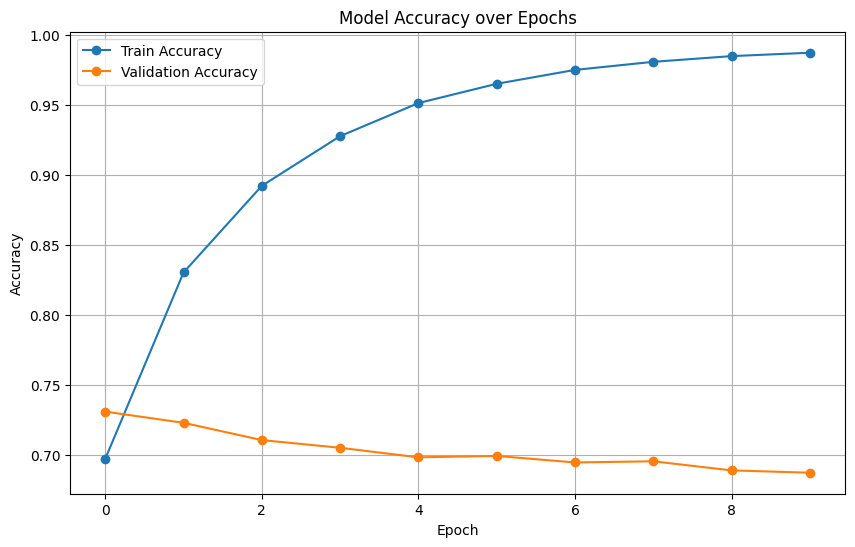

In [17]:

# Plotting the model accuracy over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# texto = 'I am sad to inform that I lost my mom'
texto = 'I am happy that I won the lottery'
processado = preprocess_text(texto)
print(processado)
novo = model.predict(vectorizer.transform(pd.Series(processado)).todense())
print(novo)

happy lottery
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.01391447 0.98608553]]


In [40]:
model.save('model.keras')

In [41]:
from joblib import dump
dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']